In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as colors
import matplotlib.cm as cm
import astropy.units as u
import astropy.constants as cst
from mpl_toolkits.mplot3d import axes3d

# matplotlib globals
plt.rc('font',   size=16)          # controls default text sizes
plt.rc('axes',   titlesize=18)     # fontsize of the axes title
plt.rc('axes',   labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick',  labelsize=14)     # fontsize of the tick labels
plt.rc('ytick',  labelsize=14)     # fontsize of the tick labels
plt.rc('legend', fontsize=18)      # legend fontsize
plt.rc('figure', titlesize=18)     # fontsize of the figure title

## Data + Auxiliary

In [8]:
########## PARAMETERS AND DATA ##########

# LVK O3, alpha = 2/3 at 25 Hz
Omega_upp = 3.4*10**(-9)
Omega_BBH = 4.7*10**(-10)
Omega_BNS = 2.*10**(-10)

Omega_BBH_up = 6.3*10**(-10)
Omega_BNS_up = 5.2*10**(-10)
Omega_BBH_low = 3.3*10**(-10)
Omega_BNS_low = 0.6*10**(-10)

# Farmer and Phinney, at 1 mHz
Omega_BWD = 3.57*10**(-12)
Omega_BWD_up = 6.*10**(-12)
Omega_BWD_low = 1.*10**(-12)

# other quantities
Omega_prefactor = 7.7e-9
s_in_Myr = (u.Myr).to(u.s)

########## AUXILIARY FUNCTIONS ##########

# LISA parabola approximation
def calc_parabola_vertex(x1, y1, x2, y2, x3, y3):
    denom = (x1-x2) * (x1-x3) * (x2-x3)
    A     = (x3 * (y2-y1) + x2 * (y1-y3) + x1 * (y3-y2)) / denom
    B     = (x3*x3 * (y1-y2) + x2*x2 * (y3-y1) + x1*x1 * (y2-y3)) / denom
    C     = (x2 * x3 * (x2-x3) * y1+x3 * x1 * (x3-x1) * y2+x1 * x2 * (x1-x2) * y3) / denom

    return A,B,C

a, b, c = calc_parabola_vertex(-3, -12, -2.5, -12.5, -2, -12)

def Omega(Omega_ref, f_ref, freq):
    '''
    Create quick f^2/3 spectrum.
    '''
    return Omega_ref*10**((2/3) * (np.log10(freq) - np.log10(f_ref)))

def parabola(freq, a, b, c):
    return a*freq**2 + b*freq+c

def make_Omega_plot(f, Omega_sim, save = False, save_name = "void", SIM_ERROR = False):

    freq = np.logspace(-5, 0, 1000, base = 10)

    fig, ax = plt.subplots(1, 1, figsize = (8,6))

    ax.plot(np.log10(freq), Omega(Omega_upp, 25, freq), linestyle = "dashed", label = "LVK Upp", color = "black", linewidth = 3)
    ax.plot(np.log10(freq), Omega(Omega_BBH, 25, freq), label = "LVK BBH", color = "red", linewidth = 3)
    ax.plot(np.log10(freq), Omega(Omega_BNS, 25, freq), label = "LVK BNS", color = "blue", linewidth = 3)
    ax.plot(np.log10(f), Omega_sim, color = "green", linewidth = 3, label = "Sim BWD")
    ax.plot(np.log10(freq), 10**parabola(np.log10(freq), a, b, c), linestyle = "dashdot", color = "purple", label = "LISA", linewidth = 3)
    ax.fill_between(np.log10(freq), Omega(Omega_BBH_low, 25, freq), Omega(Omega_BBH_up, 25, freq), color = "red", alpha = 0.2)
    ax.fill_between(np.log10(freq), Omega(Omega_BNS_low, 25, freq), Omega(Omega_BNS_up, 25, freq), color = "blue", alpha = 0.2)
    if SIM_ERROR:
        ax.fill_between(np.log10(f), Omega_sim*10**(-0.2), Omega_sim*10**(0.2), color = "green", alpha = 0.2)
    ax.grid(color = "gainsboro", alpha = 0.7)
    ax.set_xlabel(r"$\log_{10}(f$ / Hz$)$")
    ax.set_ylabel(r"$\Omega_{GW}$")

    ax.legend()
    ax.set_yscale("log")
    ax.set_ylim(10**(-13), 10**(-9))
    ax.set_xlim(-4.3, -1)
    if save:
        plt.tight_layout()
        fig.savefig("Thesis_Gijs/Figures/" + save_name + ".png")

    plt.show()    

def make_Omega_compare_plot(data1, data2):

    freq = np.logspace(-5, 0, 1000, base = 10)

    fig, ax = plt.subplots(1, 1, figsize = (10,8))

    ax.plot(np.log10(freq), Omega(Omega_upp, 25, freq), linestyle = "dashed", label = "LVK Upp", color = "black", linewidth = 3)
    ax.plot(np.log10(freq), Omega(Omega_BBH, 25, freq), label = "LVK BBH", color = "red", linewidth = 3)
    ax.plot(np.log10(freq), Omega(Omega_BNS, 25, freq), label = "LVK BNS", color = "blue", linewidth = 3)
    ax.plot(np.log10(data1.f), data1.Om, color = "green", linewidth = 3, label = "data 1")
    ax.plot(np.log10(data1.f), data1.Om, color = "orange", linewidth = 3, label = "data 2")
    ax.plot(np.log10(freq), 10**parabola(np.log10(freq), a, b, c), linestyle = "dashdot", color = "purple", label = "LISA", linewidth = 3)
    ax.fill_between(np.log10(freq), Omega(Omega_BBH_low, 25, freq), Omega(Omega_BBH_up, 25, freq), color = "red", alpha = 0.2)
    ax.fill_between(np.log10(freq), Omega(Omega_BNS_low, 25, freq), Omega(Omega_BNS_up, 25, freq), color = "blue", alpha = 0.2)
    
    ax.grid(color = "gainsboro", alpha = 0.7)
    ax.set_xlabel(r"$\log_{10}(f$ / Hz$)$")
    ax.set_ylabel(r"$\Omega_{GW}$")

    ax.legend()
    ax.set_yscale("log")
    ax.set_ylim(10**(-15), 10**(-9))
    ax.set_xlim(-5, -1)

    plt.show() 


## Actual Comparisons

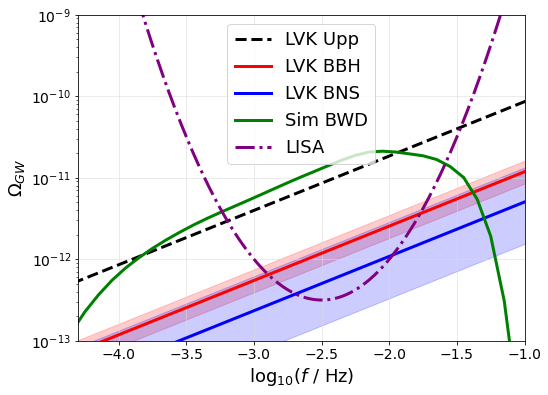

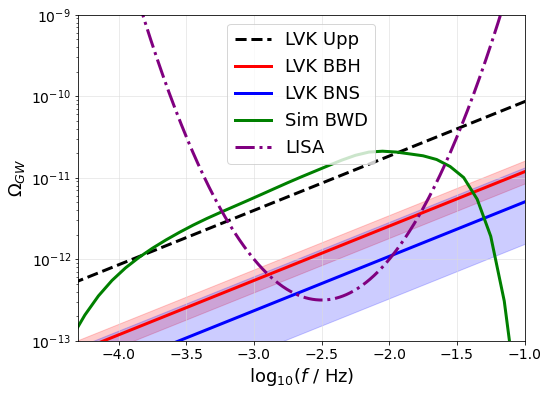

In [15]:
data_1 = pd.read_csv("../Output/GWBs/SFH1_50_20_wmerge_type2.txt")
data_2 = pd.read_csv("../Output/GWBs/SFH1_50_20_wmerge_type3.txt")

make_Omega_plot(data_1.f, data_1.Om)
make_Omega_plot(data_2.f, data_2.Om)


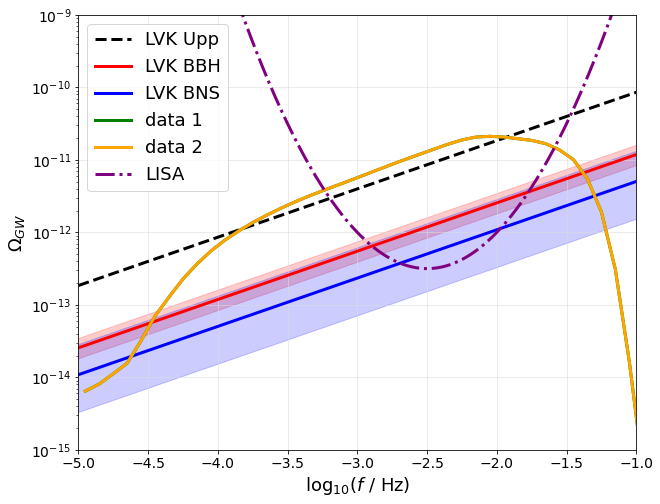

Max difference: 2.93930489466109e-14


In [16]:
make_Omega_compare_plot(data_1, data_2)

print(f"Max difference: {np.max(data_1.Om - data_2.Om)}")